#Exercício em Python - Tema 7 - Regularização de Vazão e Vazões de Permanência

Neste exercício, vamos calcular a vazão de permanência para uma série histórica de vazões de uma bacia hidrográfica, utilizando Python. Em seguida, você será desafiado a simular diferentes cenários de regularização de vazão.

## 1.Importar as bibliotecas necessárias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import io

##2. Leitura dos dados

In [ ]:
#Escolha da bacia e base de dados
bacia1 = "1"

url = ("https://raw.githubusercontent.com/brunokenmarchezepe/CABra_exercicios/main/CABRA_dataset/CABra_daily_streamflow" + "/CABra_" + bacia1 + "_streamflow.txt")

bacia_df = requests.get(url).content
bacia_df = pd.read_csv(io.StringIO(bacia_df.decode('utf-8', errors = 'ignore')),
                 skiprows = 8,
                 delimiter='\t')

bacia_df.columns = ['Year','Month','Day','Streamflow','Quality']
bacia_df.head()

,Year,Month,Day,Streamflow,Quality
0,,,,(m³s¯¹),
1,1980,10,1,1165.800,2
2,1980,10,2,1181.200,2
3,1980,10,3,1194.400,2
4,1980,10,4,1201.000,2


In [ ]:
#Exclui linha 0 pois não faz parte dos dados
bacia_df = bacia_df.drop([0], axis=0)

#Passando todos os dados para categoria numérica
bacia_df = bacia_df.apply(pd.to_numeric)
bacia_df.head()

,Year,Month,Day,Streamflow,Quality
1,1980,10,1,1165.8,2
2,1980,10,2,1181.2,2
3,1980,10,3,1194.4,2
4,1980,10,4,1201.0,2
5,1980,10,5,1203.2,2


In [ ]:
#Conversão de colunas de data para formato "dtype"
cols=["Year","Month","Day"]
bacia_df['date'] = bacia_df[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
bacia_df['date']=pd.to_datetime(bacia_df['date'])

In [ ]:
#Caso se deseje, utilizar dados a partir de determinado ano, mês e dia
#data_base = '1980-01-01'
#bacia_df = bacia_df[bacia_df.date >= data_base]
#bacia_df.head()

#Caso se deseje, utilizar ano hidrológico (1/10 a 30/09)
bacia_df['water_year'] = bacia_df.date.dt.year.where(bacia_df.date.dt.month < 10, bacia_df.date.dt.year + 1)
bacia_df.head()

,Year,Month,Day,Streamflow,Quality,date,water_year
1,1980,10,1,1165.8,2,1980-10-01,1981
2,1980,10,2,1181.2,2,1980-10-02,1981
3,1980,10,3,1194.4,2,1980-10-03,1981
4,1980,10,4,1201.0,2,1980-10-04,1981
5,1980,10,5,1203.2,2,1980-10-05,1981


In [ ]:
# Leitura da série histórica de vazão
dados = bacia_df
vazoes = dados['Streamflow'].values
dados.head()

,Year,Month,Day,Streamflow,Quality,date,water_year
1,1980,10,1,1165.8,2,1980-10-01,1981
2,1980,10,2,1181.2,2,1980-10-02,1981
3,1980,10,3,1194.4,2,1980-10-03,1981
4,1980,10,4,1201.0,2,1980-10-04,1981
5,1980,10,5,1203.2,2,1980-10-05,1981


##3. Ordenar os dados

In [ ]:
# Ordenar os valores de vazão em ordem crescente
vazoes_ordenadas = np.sort(vazoes)
n = len(vazoes_ordenadas)

In [ ]:
n

10957

##4. Calcular as vazões de permanência

In [ ]:
# Cálculo das vazões de permanência
def vazao_permanencia(vazoes, percentil):
    index = int(np.ceil((percentil / 100) * n)) - 1
    return vazoes[index]

Q90 = vazao_permanencia(vazoes_ordenadas, 90)
Q95 = vazao_permanencia(vazoes_ordenadas, 95)
Q50 = vazao_permanencia(vazoes_ordenadas, 50)

print(f"Q90: {Q90}, Q95: {Q95}, Q50: {Q50}")

Q90: 12315.36, Q95: 12728.32, Q50: 5518.961


##5. Plotar a curva de permanência

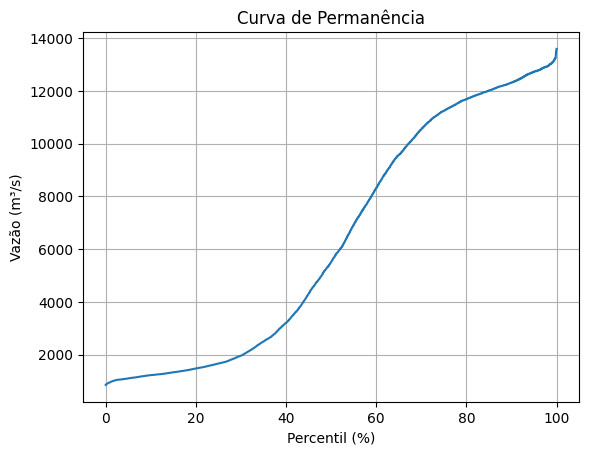

In [ ]:
# Gerar gráfico da curva de permanência
percentis = np.linspace(0, 100, n)
plt.plot(percentis, vazoes_ordenadas)
plt.xlabel('Percentil (%)')
plt.ylabel('Vazão (m³/s)')
plt.title('Curva de Permanência')
plt.grid(True)
plt.show()